In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

# IGBST Bear Capture Data Exploration

This is the data exploration phase for the Bear Capture data provided in the annual reports by the IGBST, Table 1. There are some abbreviations of note in order to better understand this data.

## Notation
### Locations
- **BDNF**: Beaverhead-Deerlodge National Forest
- **BLM**: Bureau of Land Management
- **BTNF**: Bridger-Teton National Forest
- **CTNF**: Caribou-Targhee National Forest
- **CGNF**: Custer Gallatin National Forest
- **Crk**: Creek
- **GTNP**: Grand Teton National Park
- **SNF**: Shoshone National Forest
- **YNP** Yellowstone National Park
- **WRIR**: Wind River Reservation
- **Pr**: Private
- **ID, MT, WY**: State abbreviations for Idaho, Montana, and Wyoming respectively
  - So *Pr-WY* means private Wyoming


### Organizations
- **IDFG**: Idaho Department of Fish and Game
- **IGBST**: International Grizzly Bear Study Team
- **GTNP**: Grand Teton Natiaonl Park
- **MTFWP**: Montana Fish, Wildlife, and Parks
- **WS**: Wildlife Services
- **WYGFD**: Wyoming Game and Fish Department
  - There is a variation in the abbreviation throughout the years in the actual annual summaries, but was changed to this one, in Excel, for consistent naming conventions
- **WRIR**: Wind River Reservation
- **YNP**: Yellowstone National Park

## Data Exploration

In [4]:
bearCapture = pd.read_csv('bearCapture.csv') # Read CSV

bearCapture.dtypes # Show datatypes of columns 

Bear                object
Sex                 object
Age                 object
Date                object
General Location    object
Capture type        object
Release Site        object
Handler             object
Year                 int64
dtype: object

Note that we want our Date column to have date data type

In [5]:
bearCapture.columns # All columns in the table

Index(['Bear', 'Sex', 'Age', 'Date', 'General Location', 'Capture type',
       'Release Site', 'Handler', 'Year'],
      dtype='object')

In [6]:
bearCapture.isna().sum() # Show the empty records and the column that is empty

Bear                  0
Sex                   0
Age                   0
Date                  0
General Location      1
Capture type        186
Release Site          0
Handler               1
Year                  0
dtype: int64

### Year Data

In [7]:
pd.DataFrame(bearCapture['Year'].value_counts()) # Bears captured per year

,Year
2018,129
2021,123
2020,113
2010,111
2015,109
2016,108
2011,107
2012,104
2022,100
2017,99


array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

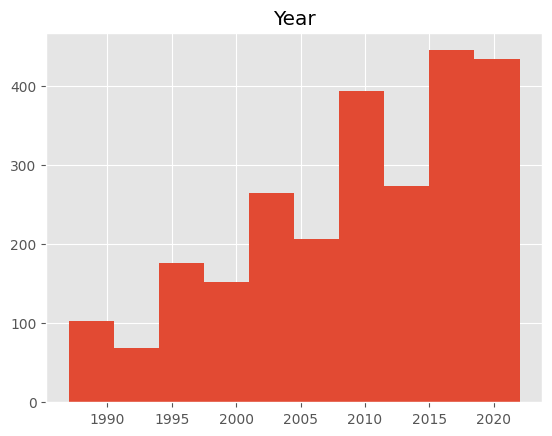

In [8]:
bearCapture.hist() # Graph of bears captures per year

### General Location Data

In [9]:
pd.DataFrame(bearCapture['General Location'].value_counts()) # Count of all locations

,General Location
"Gibbon River, YNP",62
"Cascade Crk, YNP",55
"South Fork Shoshone, Pr-WY",41
"Antelope Crk, YNP",40
"Stephens Crk, YNP",38
...,...
"Deadman Bench, SNF",1
"West Fork Long Crk, SNF",1
"Bull Elk Crk, Pr-ID",1
"Pat O'Hara Crk, Pr.-WY",1


In [10]:
pd.DataFrame(bearCapture["General Location"].str.contains("South Fork Shoshone").value_counts()) # Finding total number of records that contain South Fork Shoshone in General Location

,General Location
False,2456
True,59


We can see there are many locations that are used and some of this disparity are the abbreviations after certain locations, for instance South Fork Shoshone. We can see that there are a total of 59 items that contain South Fork Shoshone as the general location, but only 41 contain South Fork Shoshone, Pr-WY. This is important to note. 

<AxesSubplot:>

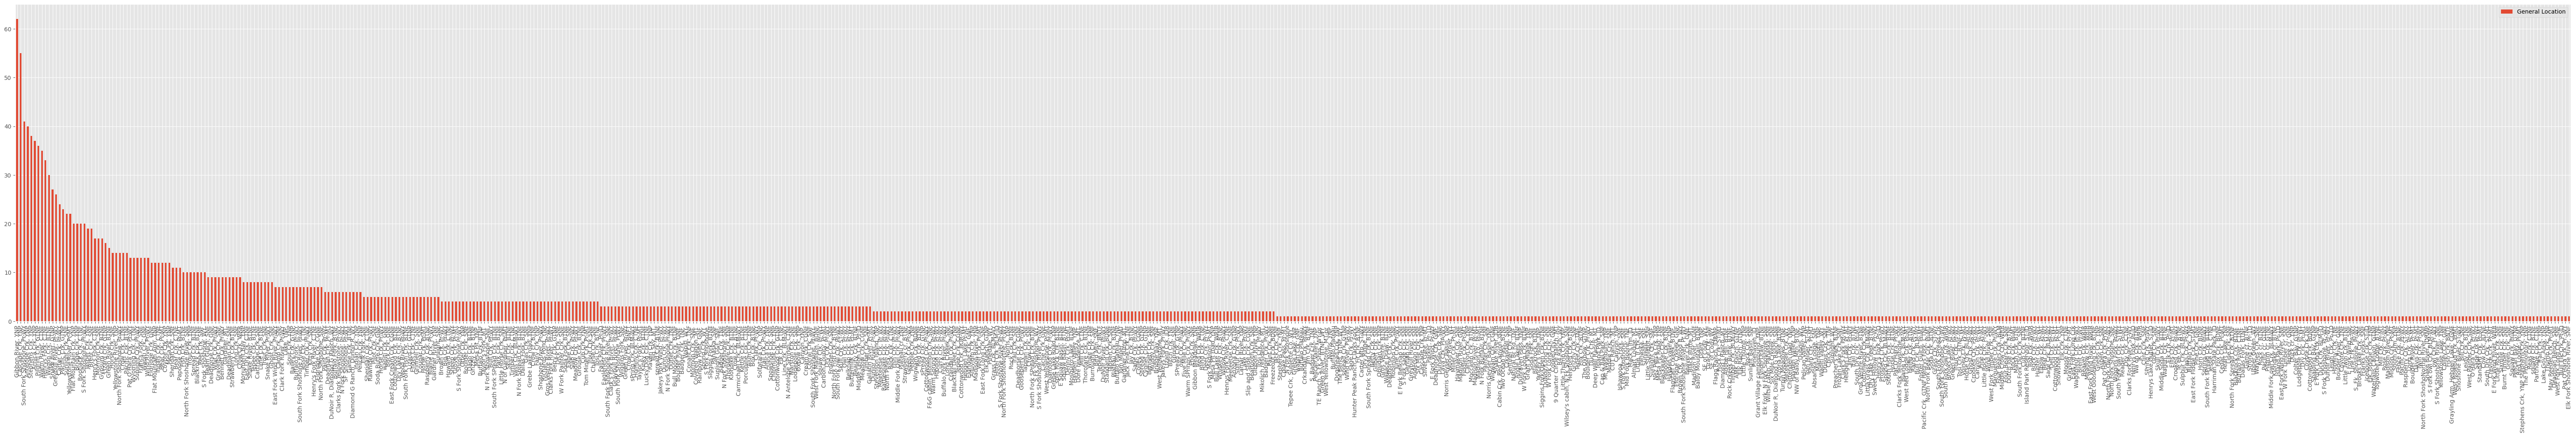

In [11]:
pd.DataFrame(bearCapture['General Location'].value_counts()).plot(kind='bar', figsize=(80,10))

### Handler Data

We can see that WYGFD makes up the greatest majority even collaborating with some other organizations, but they seem to handle most of these captures indepenently. 

**Note**: WTGF seems to be some sort of error as there is no listed meaning to the abbreviation, for this reason this data should be ommitted 

In [12]:
pd.DataFrame(bearCapture['Handler'].value_counts()) # Analayzing handler data

,Handler
WYGFD,1230
IGBST,748
IDFG,160
MTFWP,93
IDFG/IGBST,40
WS/MTFWP,39
YNP,33
IGBST/GTNP,30
WYGFD/IGBST,22
GTNP,18


<AxesSubplot:>

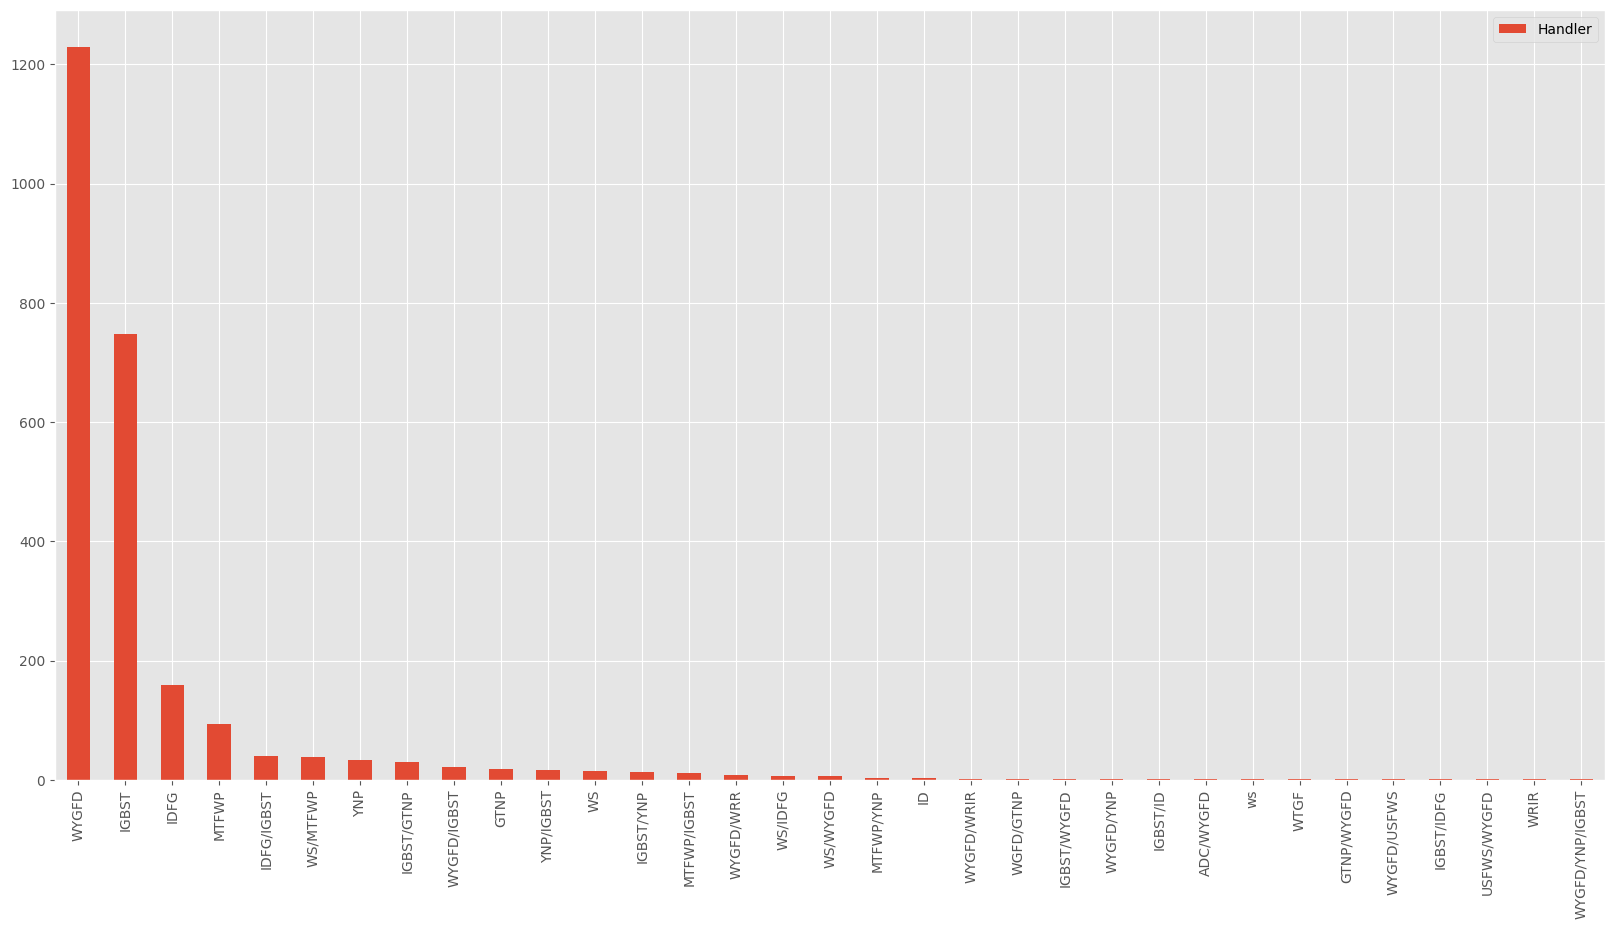

In [13]:
pd.DataFrame(bearCapture['Handler'].value_counts()).plot(kind='bar', figsize=(20,10)) # Visual Representation of handler captures

In [14]:
bearCapture[bearCapture['Handler']=='ws'] # Finding data that needs to be changed

,Bear,Sex,Age,Date,General Location,Capture type,Release Site,Handler,Year
2106,269,Male,Adult,07/12/1999,"Crow Crk, BTNF",Management,Removed,ws,1999


Need to change ws to WS

In [15]:
bearCapture[bearCapture['Handler']=='YNP'] # Records when handler is YNP

,Bear,Sex,Age,Date,General Location,Capture type,Release Site,Handler,Year
652,516,Male,Adult,10/02/2017,"Oxbow Crk, YNP",Research,On site,YNP,2017
773,804,Male,Subadult,05/08/2015,"Oxbow Crk, YNP",Research,On site,YNP,2015
824,Unm5,Female,Adult,08/08/2015,"Yellowstone River, YNP",Management,Removed,YNP,2015
825,Unm6,Female,Subadult,08/10/2015,"Yellowstone River, YNP",Management,Removed,YNP,2015
826,Unm7,Female,Subadult,08/09/2015,"Yellowstone River, YNP",Management,Removed,YNP,2015
827,Unm5,Female,Adult,08/08/2015,"Yellowstone River, YNP",Management,Removed,YNP,2015
828,Unm6,Female,Subadult,08/10/2015,"Yellowstone River, YNP",Management,Removed,YNP,2015
829,Unm7,Female,Subadult,08/09/2015,"Yellowstone River, YNP",Management,Removed,YNP,2015
1183,Unm,Male,Subadult,08/01/2011,"Bridge Crk, YNP",Management,Removed,YNP,2011
1232,Umm,Male,Subadult,09/29/2011,"Sour Crk, YNP",Management,Removed,YNP,2011


#### Year Data with Handler

In [16]:
wygfdCapture = bearCapture[bearCapture["Handler"] == "WYGFD"] # Records with handler WYGFD

pd.DataFrame(wygfdCapture['Year'].value_counts()) # Count per year

,Year
2018,74
2010,71
2021,69
2012,66
2016,59
2015,58
2020,54
2009,53
2017,50
2013,49


#### Handler and General Location

In [17]:
gibbonRiverCapture = bearCapture[bearCapture["General Location"] == "Gibbon River, YNP"] # Records with handler General Location Gibbon River, YNP

pd.DataFrame(gibbonRiverCapture['Handler'].value_counts()) # Handler count for Gibbon River, YNP

,Handler
IGBST,60
IGBST/YNP,2


In [18]:
cascadeCrkCapture = bearCapture[bearCapture["General Location"] == "Cascade Crk, YNP"] # Records with handler General Location Cascade Crk, YNP

pd.DataFrame(cascadeCrkCapture['Handler'].value_counts()) # Handler count for Cascade Crk, YNP

,Handler
IGBST,54
IGBST/YNP,1


In [19]:
sForkShoshoneCapture = bearCapture[bearCapture["General Location"] == "South Fork Shoshone, Pr-WY"] # Records with General Location South Fork Shoshone Pr-WY

pd.DataFrame(sForkShoshoneCapture['Handler'].value_counts()) # Handler count for South Fork Shoshone Pr-WY

,Handler
WYGFD,41


In [20]:
antelopeCrkCapture = bearCapture[bearCapture["General Location"] == "Antelope Crk, YNP"] # Records with handler General Location Antelope Crk, YNP

pd.DataFrame(antelopeCrkCapture['Handler'].value_counts()) # Handler count for Antelope Crk, YNP

,Handler
IGBST,37
IGBST/YNP,3


In [21]:
stephensCrkCapture = bearCapture[bearCapture["General Location"] == "Stephens Crk, YNP"] # Records with handler General Location Stephens Crk, YNP

pd.DataFrame(stephensCrkCapture['Handler'].value_counts()) # Handler count for Stephens Crk, YNP

,Handler
IGBST,30
MTFWP/YNP,4
IGBST/YNP,2
YNP/IGBST,1
YNP,1


Interesting enough many of the general locations where captures most frequently happend were conducted by IGFD, not WYGFD even though WYGFD makes up the most captures, but keep in mine the most frequented location, Gibbon River, YNP, accounts for just 62 of the captures.

### Release Site Data

We can see that many of the bears are released on the same site that they are captured, but a good amount of them are removed. 

Also note that there are removal numbers for bears removed between 2022-2017.

In [22]:
pd.DataFrame(wygfdCapture['Release Site'].value_counts())

,Release Site
On site,448
Removed,146
Transported,85
"Mormon Crk, SNF",56
"Sunlight Crk, SNF",32
...,...
Removed (201803),1
Removed (201804),1
Removed (201813),1
Removed (201818),1


In [23]:
pd.DataFrame(bearCapture["Release Site"].str.contains("Removed").value_counts()) # Finding total number of records that contain Removed

,Release Site
False,2136
True,380


In [24]:
removedCapture = bearCapture[bearCapture["Release Site"].str.contains("Removed")] # Records where bears were removed

pd.DataFrame(removedCapture['Year'].value_counts())

,Year
2018,39
2021,37
2015,33
2020,28
2022,26
2016,26
2019,21
2011,20
2010,20
2017,16


### Sex of Bear Data

We can see that the majority of the bears captured are male.

In [25]:
pd.DataFrame(bearCapture['Sex'].value_counts()) # Count for sex of bears

,Sex
Male,1630
Female,840
Unk,46


In [26]:
maleCapture = bearCapture[bearCapture["Sex"].str.contains("Male")] # Records where the Sex is Male

pd.DataFrame(maleCapture['Year'].value_counts()) # Number of records where the Sex is Male each Year

,Year
2018,85
2015,79
2011,75
2021,73
2010,72
2016,71
2020,70
2009,68
2012,68
2019,66


In [27]:
pd.DataFrame(maleCapture['General Location'].value_counts()) # Number of records where the Sex is Male by General Location

,General Location
"Cascade Crk, YNP",44
"Gibbon River, YNP",35
"Antelope Crk, YNP",32
"Warm River, CTNF",29
"South Fork Shoshone, Pr-WY",25
...,...
"Fish Crk, Pr-WY",1
"Canyon Crk, Pr-WY",1
"South Fork Shoshone, ST-WY",1
"Box Crk, BTNF",1


In [28]:
femaleCapture = bearCapture[bearCapture["Sex"].str.contains("Female")] # Number of records where the Sex is Female

pd.DataFrame(femaleCapture['Year'].value_counts()) # Number of records where the Sex is Female each Year

,Year
2021,48
2018,40
2020,37
2010,37
2012,36
2016,33
2005,32
2011,32
2022,32
2015,30


In [29]:
pd.DataFrame(femaleCapture['General Location'].value_counts()) # Number of records where the Sex is Female by General Location

,General Location
"Gibbon River, YNP",25
"Arnica Crk, YNP",19
"Stephens Crk, YNP",17
"South Fork Shoshone, Pr-WY",16
"Yellowstone River, Pr-MT",14
...,...
"Partridge Crk, CTNF",1
"Lucky Dog Crk, CTNF",1
"Owl Crk, Pr-WY",1
"Bull Crk, Pr-WY",1


### Age Data

Note that from 1987 - 1997 some of the bears have actual ages listed

In [30]:
pd.DataFrame(bearCapture['Age'].value_counts()) # Count for age of bears

,Age
Adult,1346
Subadult,748
Yearling,84
Cub,56
2,36
5,31
4,23
1,22
6,22
7,18


### Capture Type Data

In [42]:
pd.DataFrame(bearCapture['Capture type'].value_counts()) # Count for age of bears

,Capture type
Research,1244
Management,1086


## Duplicate Data

In [31]:
bearCapture.loc[bearCapture.duplicated()]

,Bear,Sex,Age,Date,General Location,Capture type,Release Site,Handler,Year
827,Unm5,Female,Adult,08/08/2015,"Yellowstone River, YNP",Management,Removed,YNP,2015
828,Unm6,Female,Subadult,08/10/2015,"Yellowstone River, YNP",Management,Removed,YNP,2015
829,Unm7,Female,Subadult,08/09/2015,"Yellowstone River, YNP",Management,Removed,YNP,2015
1123,Unm,Male,Subadult,08/24/2012,"Sheridan Crk, CTNF",Management,On site,WS/IDFG,2012
1295,Unm,Female,Subadult,07/29/2010,"Soda Butte Crk, GNF",Management,Removed,MTFWP,2010
1349,Unm,Male,Subadult,09/28/2010,"South Fork Shoshone River, Pr-WY",Management,"Boone Crk, CTNF",WYGFD,2010
1390,Unm,Unk,Subadult,06/07/2009,"Bennett Crk, Pr-WY",Management,On site,WYGFD,2009
1420,Unm,Male,Subadult,07/19/2009,"Line Crk, BLM-WY",Management,Removed,WYGFD,2009
1935,Unm,Unk,Cub,09/24/2002,"Sunlight Crk, Pr-WY",Management,"E Fork Wind, ST-WY",WYGFD,2002


In [32]:
bearCapture[bearCapture['Bear'] == '827']

,Bear,Sex,Age,Date,General Location,Capture type,Release Site,Handler,Year
821,827,Male,Subadult,08/08/2015,"Grass Crk, Pr-WY",Management,"Bailey Crk, BTNF",WYGFD,2015
822,827,Male,Subadult,09/08/2015,"East Fork Wind River, Pr-WY",Management,"Mormon Crk, SNF",WYGFD,2015
823,827,Male,Subadult,10/17/2015,"Sulphur Crk, BLM-WY",Management,Removed,WYGFD,2015


In [33]:
bearCapture[bearCapture['Bear'] == '827']

,Bear,Sex,Age,Date,General Location,Capture type,Release Site,Handler,Year
821,827,Male,Subadult,08/08/2015,"Grass Crk, Pr-WY",Management,"Bailey Crk, BTNF",WYGFD,2015
822,827,Male,Subadult,09/08/2015,"East Fork Wind River, Pr-WY",Management,"Mormon Crk, SNF",WYGFD,2015
823,827,Male,Subadult,10/17/2015,"Sulphur Crk, BLM-WY",Management,Removed,WYGFD,2015


These records aren't truly duplicates, but they are very similar, however there are many instances of the same bear being captures more than once in a given year or over the span of years. 

In [40]:
repeatBear = bearCapture.loc[bearCapture.duplicated(subset=['Bear'])]

repeatBear

,Bear,Sex,Age,Date,General Location,Capture type,Release Site,Handler,Year
4,1061,Male,Adult,05/29/2022,"Gravelbar Crk, SNF",Research,On site,WYGFD,2022
14,G275,Male,Subadult,05/30/2022,"Ghost Crk, SNF",Research,On site,WYGFD,2022
17,1063,Female,Subadult,06/06/2022,"Snake River, GTNP",Research,On site,IGBST,2022
27,1067,Male,Adult,07/27/2022,"East Dry Crk, CTNF",Research,On site,IDFG,2022
30,G277,Male,Subadult,07/19/2022,"Enget Crk, CTNF",Research,On site,IDFG,2022
...,...,...,...,...,...,...,...,...,...
2508,110,Male,5,10/21/1987,"Richards Pond, YNP",NaN,On-site,IGBST,1987
2510,79,Female,13,10/13/1987,"Stephens Crk, YNP",NaN,On-site,IGBST,1987
2512,83,Female,19,10/21/1987,"Canyon, YNP",Management,Kill,IGBST/YNP,1987
2513,141,Male,1,10/16/1987,"Canyon, YNP",Management,"Big Horn Pass Trailhead, YNP",IGBST/YNP,1987


## Conclusions

I would be interested in splitting up the month, date, and year in order to get analytics on bears captures each month. Also for bears with adges, classifying them as adult, subadult, yearling, COY in order to get more accurate data that is consistent. Another thing to consider is splitting up both the General Location and Release Site data to mainly include the main location, i.e. South Fork Shoshone instead of South Fork Shoshone, Pr-WY, and notating the Pr-WY in another column. Figuring out bears captures on private land would also be useful information. 